# Data Scientist vs size of Datasets (France experiment 2016)

In [2]:
import pandas as pd
DS = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/Data_Scientists_France.csv")
DS.head()

,ID,DS_1,DS_2,DS_3,DS_4,DS_5,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9
0,1,No,No,Large,No,Yes,Intel,Yes,1400,4,32,No,Python,Python,Python
1,2,No,No,Large,No,No,AMD,No,800,2,16,No,Python,Python,Python
2,3,No,No,Medium,No,Yes,Intel,No,2400,4,24,No,R,R,R
3,4,No,No,Large,No,Yes,Intel,Yes,1000,2,4,No,R,R,R
4,5,No,Yes,Medium,Yes,Yes,Intel,No,900,2,12,No,"R, Python",R,R


### Data Columns

- ID: A unique identifier for each data scientist.
- DS_1 to DS_5: These columns seem to represent certain attributes or skills of data scientists, but it's not clear what each column stands for without a description.
- W_1: This might represent the type of processor used (e.g., Intel, AMD).
- W_2: A binary attribute, possibly indicating the presence or absence of a certain feature.
- W_3: This could represent a numerical attribute, such as salary or years of experience.
- W_4: Another numerical attribute, possibly indicating something like team size or number of projects.
- W_5: This seems to be another numerical attribute.
- W_6: A binary attribute, similar to W_2.
- W_7, W_8, W_9: These columns likely represent programming languages or tools used by the data scientists.

Based on this understanding, let's formulate a few hypotheses and create relevant graphs:



### Hypothesis: There is a relationship between the processor type (W_1) and the programming languages/tools used (W_7, W_8, W_9).

The graphs above represent the distribution of programming languages/tools used (W_7, W_8, W_9) by data scientists based on their processor type (W_1). This visualization helps in understanding if there's any noticeable pattern or preference in programming language/tool usage based on the type of processor.


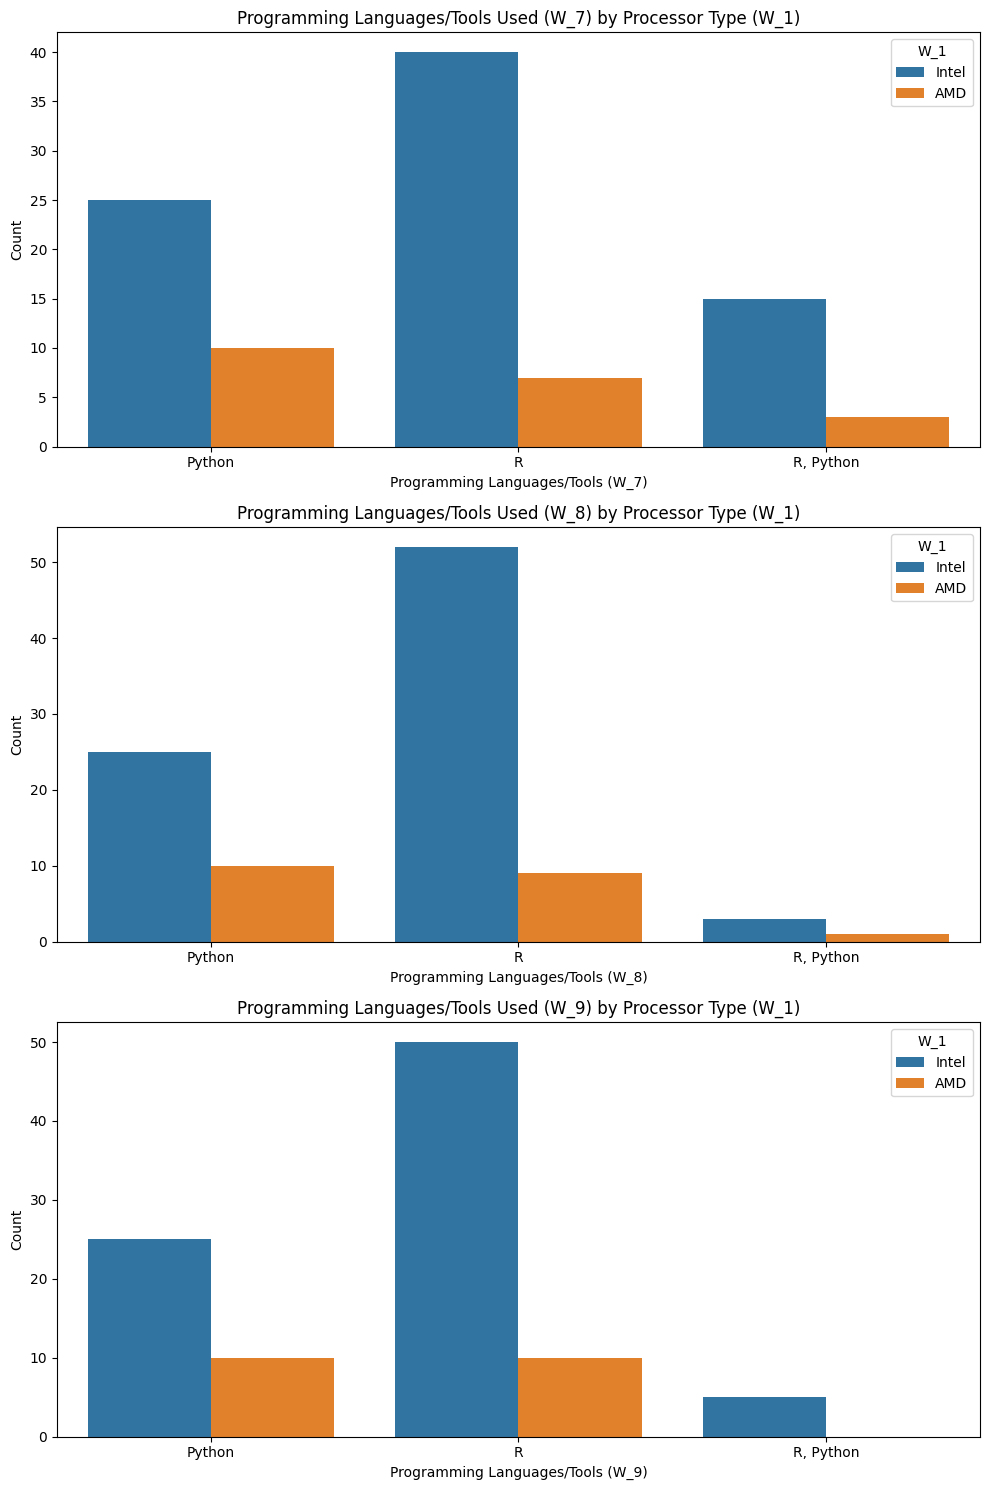

In [3]:
import pandas as pd
data_scientists_france = DS

import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis 1: Relationship between processor type and programming languages/tools used
# We will create a countplot for each of W_7, W_8, W_9 based on the processor type

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.countplot(data=data_scientists_france, x='W_7', hue='W_1', ax=axes[0])
axes[0].set_title('Programming Languages/Tools Used (W_7) by Processor Type (W_1)')
axes[0].set_xlabel('Programming Languages/Tools (W_7)')
axes[0].set_ylabel('Count')

sns.countplot(data=data_scientists_france, x='W_8', hue='W_1', ax=axes[1])
axes[1].set_title('Programming Languages/Tools Used (W_8) by Processor Type (W_1)')
axes[1].set_xlabel('Programming Languages/Tools (W_8)')
axes[1].set_ylabel('Count')

sns.countplot(data=data_scientists_france, x='W_9', hue='W_1', ax=axes[2])
axes[2].set_title('Programming Languages/Tools Used (W_9) by Processor Type (W_1)')
axes[2].set_xlabel('Programming Languages/Tools (W_9)')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Hypothesis: The numerical attributes (W_3, W_4, W_5) might show correlations, indicating relationships between these characteristics.

The heatmap above displays the correlations between the numerical attributes W_3, W_4, and W_5. The values in the heatmap range from -1 to 1, where 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and values close to 0 indicate a lack of correlation. This visualization helps in understanding the relationships between these numerical attributes.

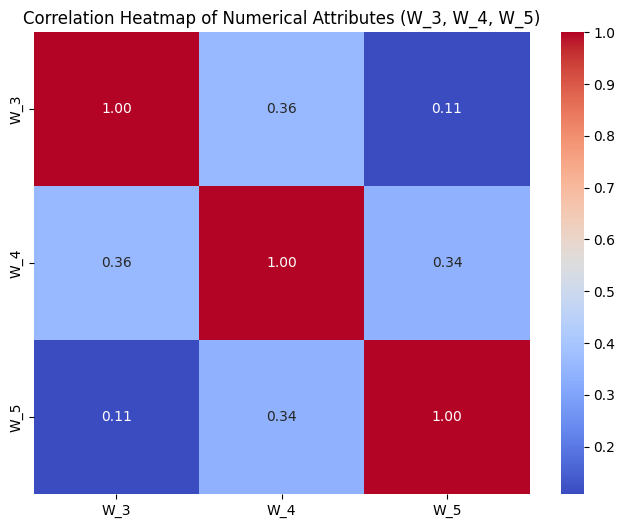

In [5]:
import pandas as pd
data_scientists_france = DS

# Correlation heatmap of numerical attributes W_3, W_4, W_5
numeric_columns = ['W_3', 'W_4', 'W_5']
data_scientists_france[numeric_columns] = data_scientists_france[numeric_columns].apply(pd.to_numeric, errors='coerce')
correlation_matrix = data_scientists_france[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Attributes (W_3, W_4, W_5)')
plt.show()


### Hypothesis: The binary attributes (representing certain skills, tools, or features) have an impact on the numerical attribute W_3 (which might represent salary, years of experience, or another key metric).

The boxplots above show the distribution of the numerical attribute W_3 across different categories of each binary attribute (DS_1, DS_2, DS_4, DS_5, W_2, W_6). These visualizations can help identify if there are significant differences in W_3 values based on the presence or absence of certain features or skills represented by the binary attributes.

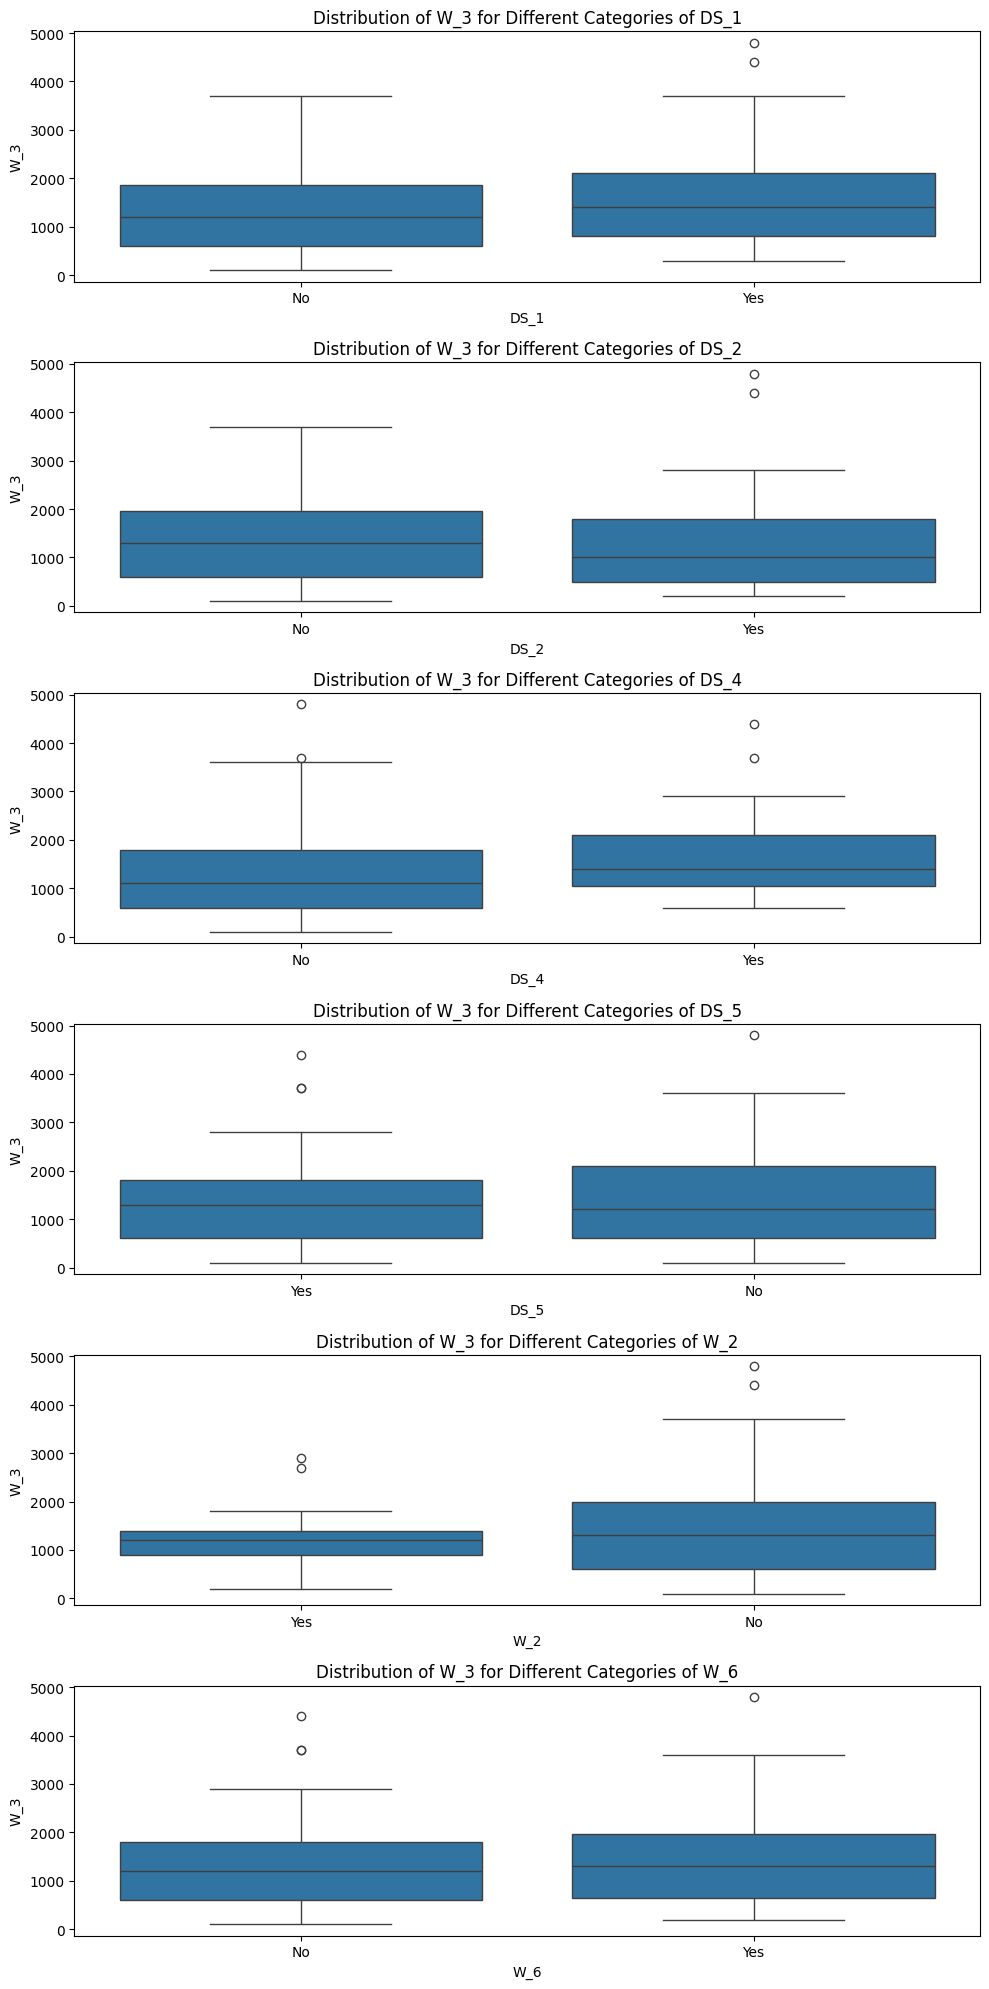

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Boxplots for binary attributes against W_3
binary_columns = ['DS_1', 'DS_2', 'DS_4', 'DS_5', 'W_2', 'W_6']
fig, axes = plt.subplots(len(binary_columns), 1, figsize=(10, 20))

for i, column in enumerate(binary_columns):
    sns.boxplot(data=data_scientists_france, x=column, y='W_3', ax=axes[i])
    axes[i].set_title(f'Distribution of W_3 for Different Categories of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('W_3')

plt.tight_layout()
plt.show()
